In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Read the data from the CSV file into a DataFrame and display the first five rows.
df = pd.read_csv('/content/hw4_exams.csv')
print(df.head())

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


In [8]:
 #Display the basic information for the DataFrame and its columns using the info() method.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
# Display statistical information for the math score, reading score, and writing score columns using the describe() method.
print(df[['math score', 'reading score', 'writing score']].describe())

       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


In [10]:
#4. Group the data by the race/ethnicity column and display the mean scores.
mean_scores = df.groupby('race/ethnicity')[['math score', 'reading score', 'writing score']].mean()
print(mean_scores)

                math score  reading score  writing score
race/ethnicity                                          
group A          61.629213      64.674157      62.674157
group B          63.452632      67.352632      65.600000
group C          64.463950      69.103448      67.827586
group D          67.362595      70.030534      70.145038
group E          73.821429      73.028571      71.407143


In [11]:
#. Display a single column as a DataFrame with bracket notation.
math_score_df = df[['math score']]
print(math_score_df)

     math score
0            72
1            69
2            90
3            47
4            76
..          ...
995          88
996          62
997          59
998          68
999          77

[1000 rows x 1 columns]


In [12]:
#. Display a single column as a Series with bracket notation.
math_score_series = df['math score']
print(math_score_series)

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64


In [17]:
#7. Display a single column as a Series with dot notation.
gender_series = df.gender
print(gender_series)

0      female
1      female
2      female
3        male
4        male
        ...  
995    female
996      male
997    female
998    female
999    female
Name: gender, Length: 1000, dtype: object


In [18]:
#8. Display only rows for females with a math score greater than or equal to 90.
filtered_df = df[(df['gender'] == 'female') & (df['math score'] >= 90)]

print(filtered_df)

     gender race/ethnicity parental level of education         lunch  \
2    female        group B             master's degree      standard   
114  female        group E           bachelor's degree      standard   
165  female        group C           bachelor's degree      standard   
179  female        group D            some high school      standard   
263  female        group E                 high school      standard   
451  female        group E                some college      standard   
458  female        group E           bachelor's degree      standard   
474  female        group B          associate's degree      standard   
501  female        group B          associate's degree      standard   
503  female        group E          associate's degree      standard   
521  female        group C          associate's degree      standard   
546  female        group A            some high school      standard   
566  female        group E           bachelor's degree  free/red

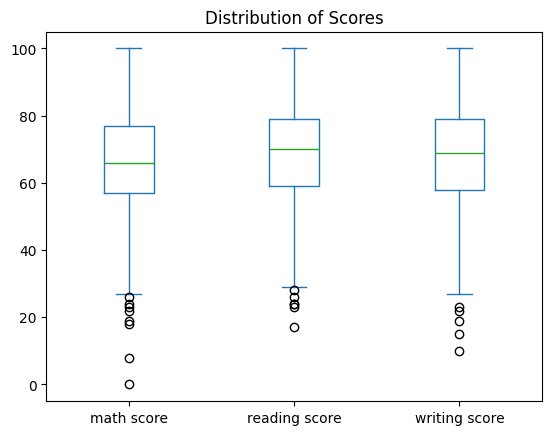

In [22]:
#9. Use the pandas plot() method to create a box plot.
df[['math score', 'reading score', 'writing score']].plot(kind='box', title='Distribution of Scores')

plt.show()


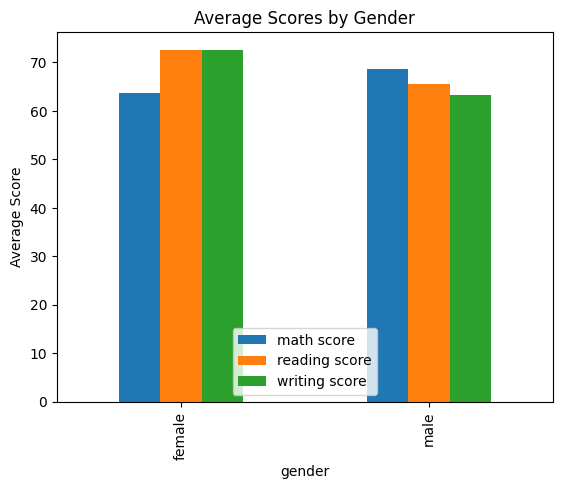

In [23]:
#. Group the data by the gender column and calculate the average scores. Then create a bar plot.
gender_avg_scores = df.groupby('gender')[['math score', 'reading score', 'writing score']].mean()

gender_avg_scores.plot(kind='bar', title='Average Scores by Gender')

plt.ylabel('Average Score')
plt.show()

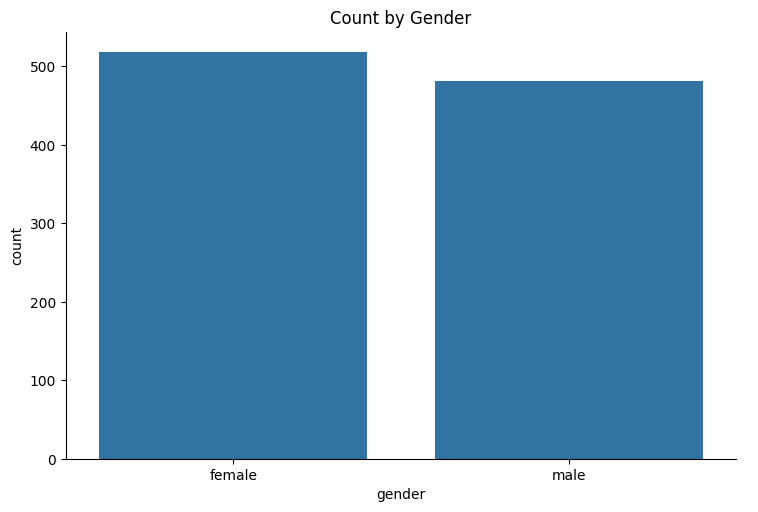

In [26]:
# Use the Seaborn catplot() method to create a plot like the one below. To make that easy to do, you can use a count plot.
sns.catplot(x='gender', data=df, kind='count', height=5, aspect=1.5)

plt.title('Count by Gender')

plt.show()

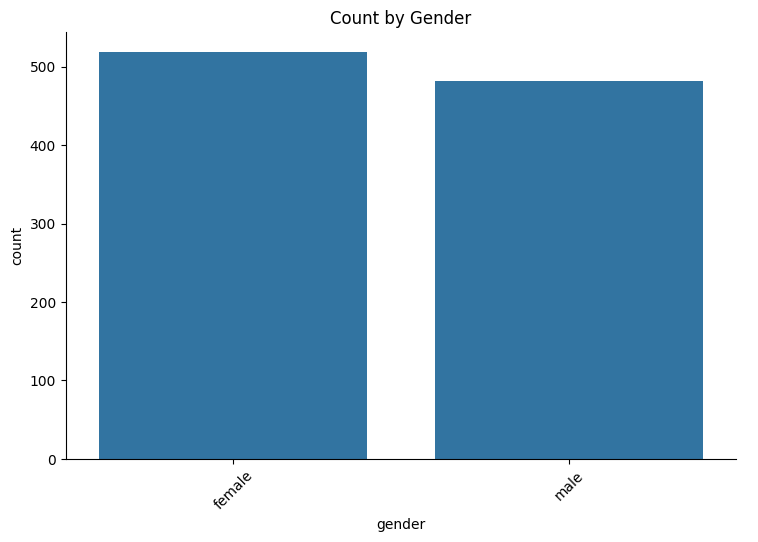

In [27]:
# Rotate the x labels for the above plot to make them readable.
sns.catplot(x='gender', data=df, kind='count', height=5, aspect=1.5)

plt.xticks(rotation=45)

plt.title('Count by Gender')

plt.show()

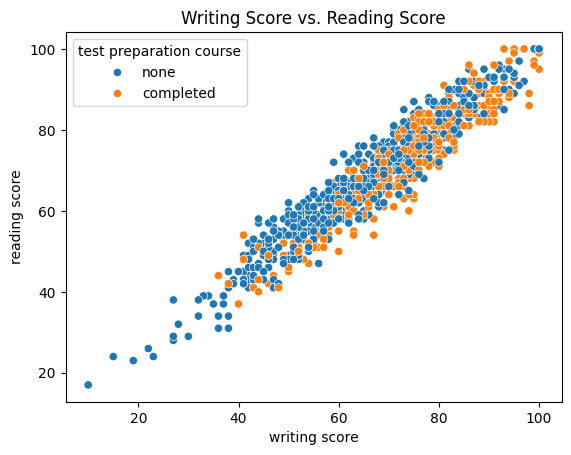

In [30]:
#13. Create a scatter plot with a specific method that compares the writing score with the reading score.
sns.scatterplot(x='writing score', y='reading score', data=df, hue='test preparation course')

plt.title('Writing Score vs. Reading Score')

plt.show()

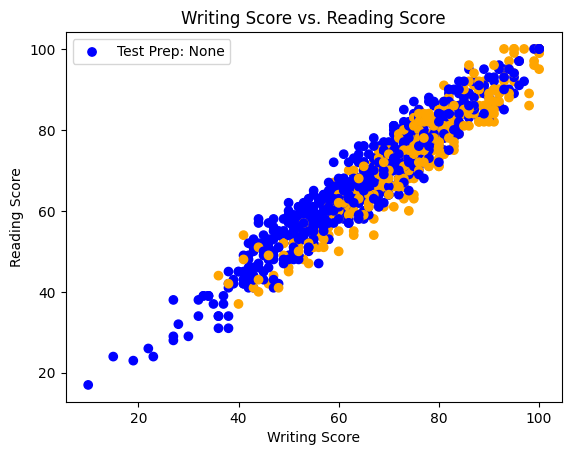

In [31]:
#14. Create the same plot with a general method.
colors = df['test preparation course'].map({'none': 'blue', 'completed': 'orange'})

plt.scatter(df['writing score'], df['reading score'], c=colors)

plt.title('Writing Score vs. Reading Score')
plt.xlabel('Writing Score')
plt.ylabel('Reading Score')

plt.legend(['Test Prep: None', 'Test Prep: Completed'], loc='best')

plt.show()

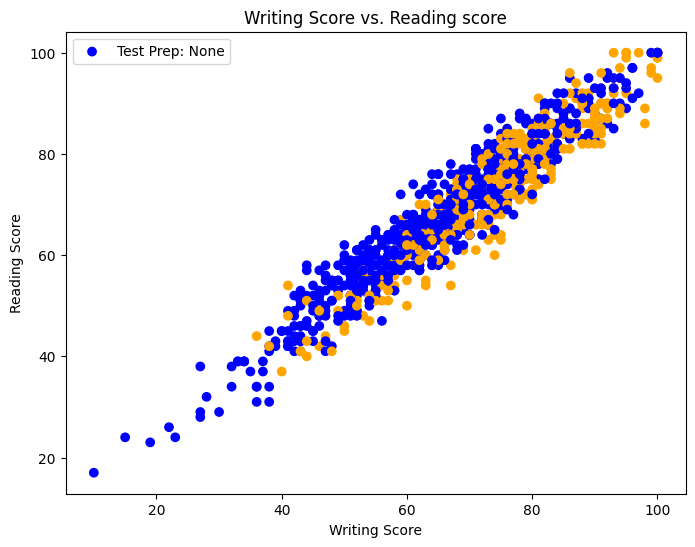

In [32]:
#15. Adjust the size of the scatter plot you created with the general method so it’s more like the size of the scatter plot with the specific method.
plt.figure(figsize=(8, 6))
colors = df['test preparation course'].map({'none': 'blue', 'completed': 'orange'})

plt.scatter(df['writing score'], df['reading score'], c=colors)

plt.title('Writing Score vs. Reading score')
plt.xlabel('Writing Score')
plt.ylabel('Reading Score')

plt.legend(['Test Prep: None', 'Test Prep: Completed'], loc='best')

plt.show()